# Dropping Duplicates

#### `df.drop_duplicates([subset])`

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html#pandas.DataFrame.drop_duplicates

# Counting Values

#### `df.value_counts([sort = True], [normalize = False])`

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html#pandas.DataFrame.value_counts


### Practice

In [ ]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset = ['store', 'type'])
print(store_types.head())

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset = ['store', 'department'])
print(store_depts.head())

# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales['is_holiday'] == True].drop_duplicates(subset = ['date'])

# Print date col of holiday_dates
print(holiday_dates['date'])

In [ ]:
# Count the number of stores of each type
store_counts = sales.value_counts(subset = ['type'])
print(store_counts)

# Get the proportion of stores of each type
store_props = sales.value_counts(subset = ['type'], normalize = True)
print(store_props)

# Count the number of stores for each department and sort
dept_counts_sorted = sales.value_counts(subset = ['department'], sort = True)
print(dept_counts_sorted)

# Get the proportion of stores in each department and sort
dept_props_sorted = sales.value_counts(sort= True, normalize= True)
print(dept_props_sorted)

# Grouped Statistics

#### groupby()

###### `pandas.DataFrame.groupbyDataFrame.groupby(by=None, axis=<no_default>, level=None, as_index=True, sort=True, group_keys=True, observed=<no_default>, dropna=True)`

###### https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby


### Practice

In [30]:
import pandas as pd

sales = pd.read_csv('sales_subset.csv')

sales.info()

# Calc total weekly sales
sales_all = sales['weekly_sales'].sum()
print(f"Total Sales ${sales_all:,.2f}")

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales['type'] == 'A']['weekly_sales'].sum()
print(f"Type A Sales: ${sales_A:,.2f}")

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales['type'] == 'B']['weekly_sales'].sum()
print(f"Type B Sales: ${sales_B:,.2f}")

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales['type'] == 'C']['weekly_sales'].sum()
print(f"Type C Sales: ${sales_C:,.2f}")

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C]/sales_all
print(sales_propn_by_type)


# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = sales_by_type / sum(sales_by_type)
print(sales_propn_by_type)

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(['type','is_holiday'])['weekly_sales'].sum()
print(sales_by_type_is_holiday)

# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby("type")["weekly_sales"].agg(['min','max','mean'])

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby("type")[['unemployment','fuel_price_usd_per_l']].agg(['min','max','mean','median'])

# Print unemp_fuel_stats
print(unemp_fuel_stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10774 non-null  int64  
 1   store                 10774 non-null  int64  
 2   type                  10774 non-null  object 
 3   department            10774 non-null  int64  
 4   date                  10774 non-null  object 
 5   weekly_sales          10774 non-null  float64
 6   is_holiday            10774 non-null  bool   
 7   temperature_c         10774 non-null  float64
 8   fuel_price_usd_per_l  10774 non-null  float64
 9   unemployment          10774 non-null  float64
dtypes: bool(1), float64(4), int64(3), object(2)
memory usage: 768.2+ KB
Total Sales $256,894,718.90
Type A Sales: $233,716,315.01
Type B Sales: $23,178,403.89
Type C Sales: $0.00
[0.9097747 0.0902253 0.       ]
type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64

# Pivot Tables

###### `pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=<no_default>, sort=True)`
## Pivot on One Variable
#### 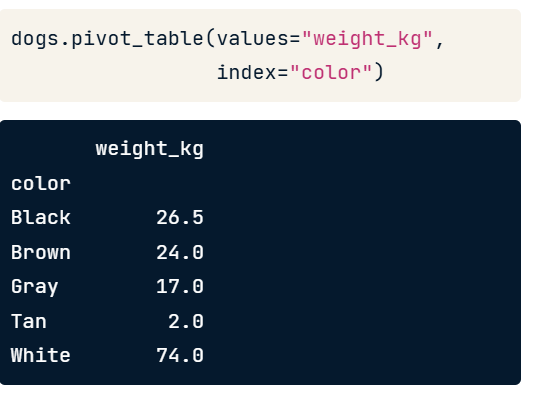

#### 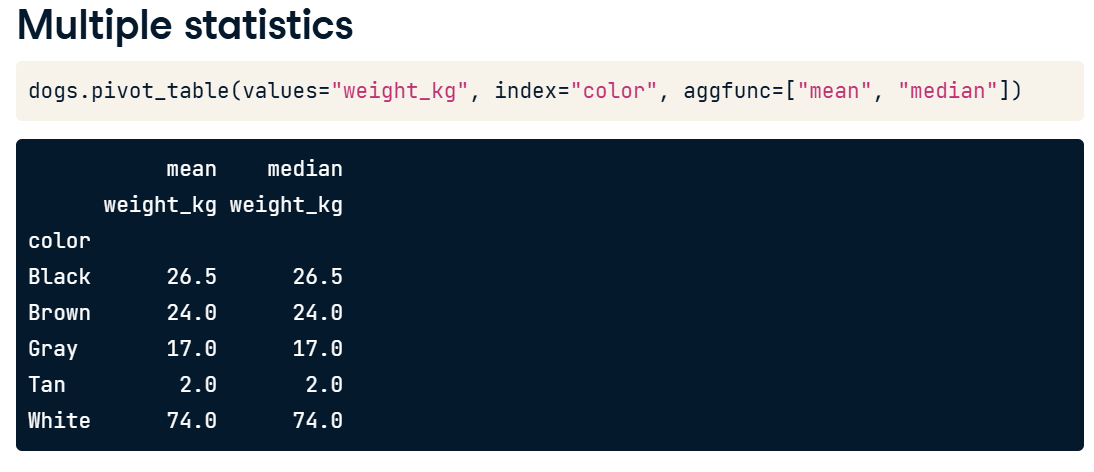

## Pivot on two variables

#### 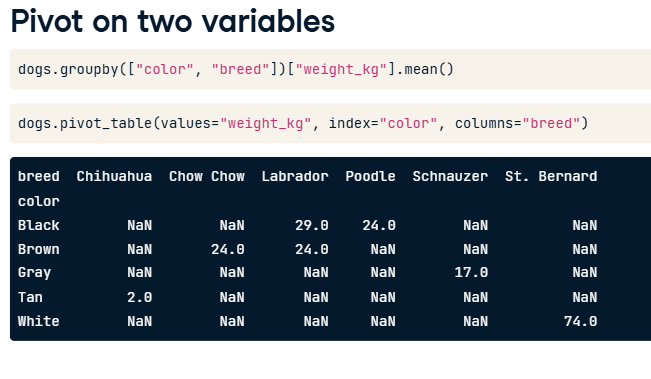

## Fill Missing Values

#### 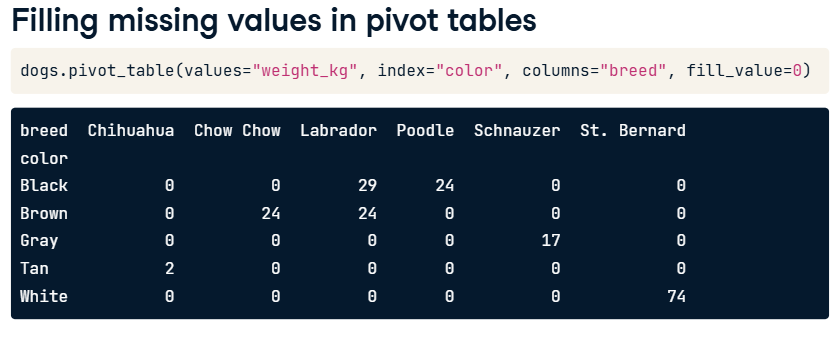

## Summing with pivot tables

#### 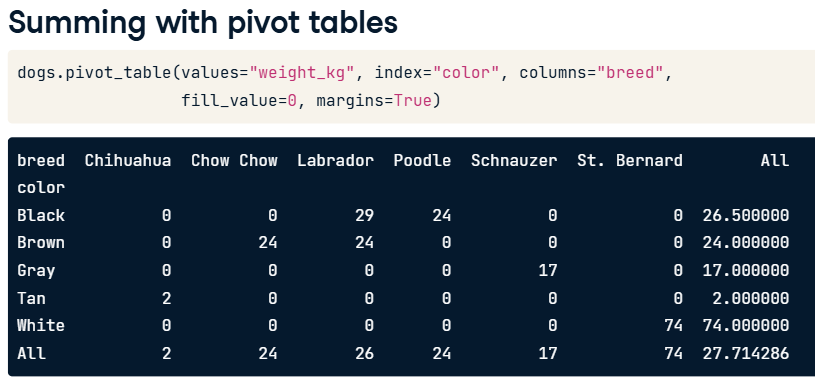


### Practice

In [7]:
import pandas as pd

sales = pd.read_csv('sales_subset.csv')

# Get the mean weekly_sales by type using a pivot table
mean_sales_by_type = sales.pivot_table(values='weekly_sales',index = 'type')

# Print mean_sales_by_type
print(mean_sales_by_type)

# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table(values='weekly_sales',index = 'type', aggfunc = ['mean','median'])

# Print mean_med_sales_by_type
print(mean_med_sales_by_type)

# Pivot sales to get mean of weekly_sales by type and is_holiday
mean_sales_by_type_holiday = sales.pivot_table(values = 'weekly_sales', index = 'type', columns = 'is_holiday')

# Print mean_sales_by_type_holiday
mean_sales_by_type_holiday

# Print mean weekly_sales by department and type; fill missing values with 0
print(sales.pivot_table(values = 'weekly_sales', index = 'type', columns = 'department', fill_value = 0))

# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
print(sales.pivot_table(values = 'weekly_sales', index = 'type', columns = 'department', fill_value = 0, margins = True))

      weekly_sales
type              
A     23674.667242
B     25696.678370
              mean       median
      weekly_sales weekly_sales
type                           
A     23674.667242     11943.92
B     25696.678370     13336.08
department            1              2             3             4   \
type                                                                  
A           30961.725379   67600.158788  17160.002955  44285.399091   
B           44050.626667  112958.526667  30580.655000  51219.654167   

department            5             6             7             8   \
type                                                                 
A           34821.011364   7136.292652  38454.336818  48583.475303   
B           63236.875000  10717.297500  52909.653333  90733.753333   

department            9             10  ...            90            91  \
type                                    ...                               
A           30120.449924  30930.456364  ...  857

# Explicit Indexing

## 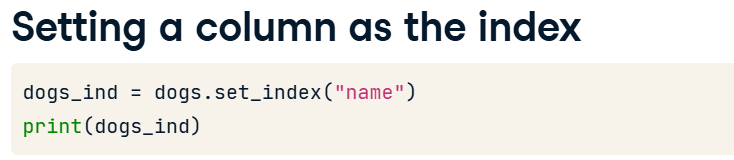

## 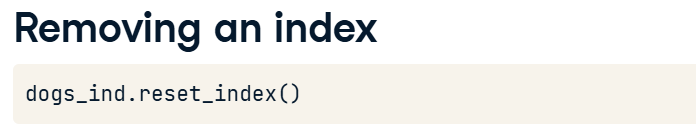
### removes the index but keeps the values

## 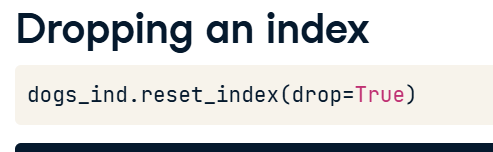 
### deletes the index and values

## 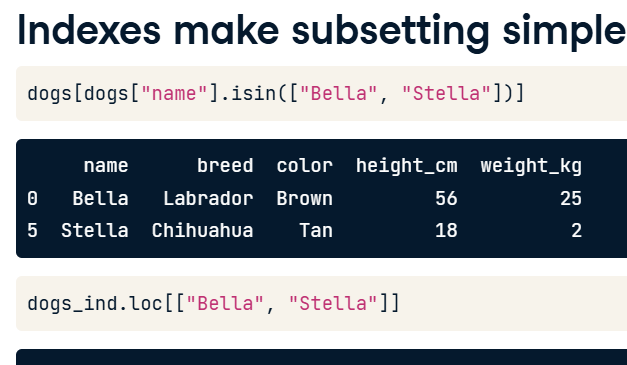